# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.
The test is explained in the ReadMe File

# Model Reproducibility setup steps
# Findings
From the publication, it seems like the authors have evaluated the performance of the model, BayeshERG, on various datasets and compared it with other models using metrics such as sensitivity (SEN), specificity (SPE), Matthews correlation coefficient (MCC), balanced accuracy (BAC), and F1 score.

In the paper, they performed both internal and external evaluations to test various aspects of BayeshERG. For the internal evaluation, they evaluated the predictive power and reliability of the proposed model. In other words, they compared both the prediction and calibration perfor-mances of other baseline models trained with the same data. For the baseline models, we used conventional MLmodels [random forest (RF), SVM] and ablated graph-based DL models (removing one or more among MC-dropout, GMHAP and transfer learning modules). They also used Morgan fingerprints calculated using RDKit as the input feature of the ML models. As for the external evaluation, we evaluated the general performance of BayeshERG compared to publicly available hERG pre-diction tools. We retrained our model with a full fine-tuning set and evaluated its performance on the afore-mentioned two external test sets. We divided the com-parative models into two categories: ML-based and DL-based models

# Focus for this Task
I will focus on reproducing the performance evaluation of the BayeshERG model on the external test sets. This test dataset seems to be a significant part of their evaluation, and we are choosing varied performance metrics to reproduce.




In [17]:
# In this code block I will import the necessary packages and specify the paths to relevant folder
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
# folders
# Get the current working directory
current_dir = os.getcwd()

# Navigate to the parent directory (to access the model's directory)
parent_dir = os.path.dirname(current_dir)

# Path to the BayeshERG model directory
model_dir = os.path.join(parent_dir, 'models', 'BayeshERG')

# Path original external datasets
data_dir = os.path.join(parent_dir, 'data')
EX1_csv_path = os.path.join(data_dir, 'EX1.csv')
EX2_csv_path = os.path.join(data_dir, 'EX2.csv')
EX3_csv_path = os.path.join(data_dir, 'EX3.csv')
EX4_csv_path = os.path.join(data_dir, 'EX4.csv')

# Display the first few rows of each DataFrame to inspect the data

original_df = pd.read_csv(EX1_csv_path)
print(original_df)

original2_df = pd.read_csv(EX2_csv_path)
print(original2_df)

original3_df = pd.read_csv(EX3_csv_path)
print(original3_df)

original4_df = pd.read_csv(EX4_csv_path)
print(original4_df)

#pretraining datasets





       id                                             smiles  label
0    Ex_1                      CCOC(=O)C1(c2ccccc2)CCN(C)CC1      0
1    Ex_2                         CCN(CC)CC(=O)Nc1c(C)cccc1C      0
2    Ex_3                                    CCCC(CCC)C(=O)O      0
3    Ex_4    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C      0
4    Ex_5  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...      0
5    Ex_6      COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC      1
6    Ex_7        COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2      1
7    Ex_8  CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...      0
8    Ex_9  CCCc1nn(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(C)CC4...      0
9   Ex_10  CC(=O)SC1CC2=CC(=O)CCC2(C)C2CCC3C(CCC34CCC(=O)...      0
10  Ex_11  COc1ccc(C(=O)N2CCN(c3ccc4c(c3)CCC(=O)N4)CC2)cc1OC      1
11  Ex_12         CCS(=O)(=O)NC1c2cc(C#N)ccc2C(=O)C(C)(C)C1O      1
12  Ex_13    CCOC(=O)C1=C(COCCN)NC(C)=C(C(=O)OC)C1c1ccccc1Cl      1
13  Ex_14  CN1CC(=O)C2C(Cc3c([nH]c4ccccc34)C2c2c

# Model Reproducibility setup steps
# Execution
From my terminal shell I Created conda virtual environment and installed dependencies

$ conda env create --name BayeshERG --file=environment.yml

I then activated the environment

$ conda activate BayeshERG

I made the prediction;

$ python main.py -i data/External/EX1.csv -o EX1_pred -c cpu -t 30

This helped me obtain the predictions(EX1_pred.csv) from  the original authors code implementation and using the dataset used as  the external test set 1(EX1.csv) 

Repeated this for various sets to get more predictions





In [3]:
# In this code block I will load the predictions obtained from the original author's code implementation from the /data folder

#path to predictive performace sets

EX1_prediction_csv_path = os.path.join(data_dir, 'EX1_pred.csv')
EX2_prediction_csv_path = os.path.join(data_dir, 'EX2_pred.csv')
EX3_prediction_csv_path = os.path.join(data_dir, 'EX3_pred.csv')
EX4_prediction_csv_path = os.path.join(data_dir, 'EX4_pred.csv')

# Display the first few rows of each DataFrame to inspect the data
predictions1_df = pd.read_csv(EX1_prediction_csv_path)
print(predictions1_df.head())
predictions2_df = pd.read_csv(EX2_prediction_csv_path)
print(predictions2_df.head())
predictions3_df = pd.read_csv(EX3_prediction_csv_path)
print(predictions3_df.head())
predictions4_df = pd.read_csv(EX4_prediction_csv_path)
print(predictions4_df.head())



     id                                             smiles  label     score  \
0  Ex_1                      CCOC(=O)C1(c2ccccc2)CCN(C)CC1      0  0.996863   
1  Ex_2                         CCN(CC)CC(=O)Nc1c(C)cccc1C      0  0.996623   
2  Ex_3                                    CCCC(CCC)C(=O)O      0  0.996775   
3  Ex_4    CCC(COC(=O)c1cc(OC)c(OC)c(OC)c1)(c1ccccc1)N(C)C      0  0.996471   
4  Ex_5  COc1ccc(N(C(C)=O)c2cc3c(cc2[N+](=O)[O-])OC(C)(...      0  0.997237   

       alea      epis  
0  0.003114  0.000013  
1  0.003345  0.000020  
2  0.003188  0.000026  
3  0.003482  0.000035  
4  0.002747  0.000008  
                   id                                             smiles  \
0       acalabrutinib  CC#CC(=O)N1CCCC1c1nc(-c2ccc(C(=O)Nc3ccccn3)cc2...   
1  aclidinium bromide  O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...   
2            afatinib  CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...   
3          alogliptin         Cn1c(=O)cc(N2CCCC(N)C2)n(Cc2ccccc2C#N)c1=O   
4

In [4]:
# In this codeblock I will recreate the figure or value I am to reproduce, for example a AUC
# to get metrics, we need to compare the predicted scores with the actual labels

# Function to calculate performance metrics
def calculate_metrics(true_labels, predicted_labels):
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Sensitivity (True Positive Rate)
    sen = recall_score(true_labels, predicted_labels)
    
    # Specificity (True Negative Rate)
    spe = tn / (tn + fp)
    
    # Precision
    precision = precision_score(true_labels, predicted_labels)
    
    # F1 score
    f1 = f1_score(true_labels, predicted_labels)
    
    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(true_labels, predicted_labels)
    
    # Balanced Accuracy (BAC)
    bac = (sen + spe) / 2
    
    return accuracy, sen, spe, precision, f1, mcc, bac

# Extract true labels and predicted scores for BayeshERG
true_labels = original_df['label']
bayesherg_scores = predictions1_df['score']

# Convert scores to binary predictions (0 or 1) using a threshold (e.g., 0.5)
threshold = 0.5
bayesherg_predictions = (bayesherg_scores >= threshold).astype(int)

# Calculate metrics for BayeshERG
bayesherg_metrics = calculate_metrics(true_labels, bayesherg_predictions)


# Display the calculated metrics
print("BayeshERG Performance Metrics:")
print("Accuracy:", bayesherg_metrics[0])
print("SEN (Sensitivity):", bayesherg_metrics[1])
print("SPE (Specificity):", bayesherg_metrics[2])
print("Precision:", bayesherg_metrics[3])
print("F1 Score:", bayesherg_metrics[4])
print("MCC (Matthews correlation coefficient):", bayesherg_metrics[5])
print("BAC (Balanced Accuracy):", bayesherg_metrics[6])

# The focus is about the BAC value, given that I used the threshold of 0.5 which means that the probability output by the model above 
# which a sample is classified as positive (1) and below which it's classified as negative (0)
# in this context, the threshold of 0.5 means that if the predicted probability of a compound being active is greater than or
# equal to 0.5, it's classified as active (1)




BayeshERG Performance Metrics:
Accuracy: 0.6818181818181818
SEN (Sensitivity): 1.0
SPE (Specificity): 0.0
Precision: 0.6818181818181818
F1 Score: 0.8108108108108109
MCC (Matthews correlation coefficient): 0.0
BAC (Balanced Accuracy): 0.5


In [5]:
# In this code block I will load the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder
#  path to the CSV file using the relative path
predictions_csv_file_path = os.path.join("..", "data", "module_predictions.csv")
# Load the predictions CSV file into a DataFrame
predictions_df = pd.read_csv(predictions_csv_file_path)

# Display more info about the data frame to inspect the data
print(predictions_df.head())
print(predictions_df.info())




                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input     score      alea  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1  0.425770  0.232899   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1  0.414392  0.233519   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl  0.428984  0.232990   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...  0.421347  0.232110   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...  0.421505  0.232251   

       epis  
0  0.011591  
1  0.009152  
2  0.011966  
3  0.011704  
4  0.011588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     1000 non-null   object 
 1   input   1000 non-null   object 
 

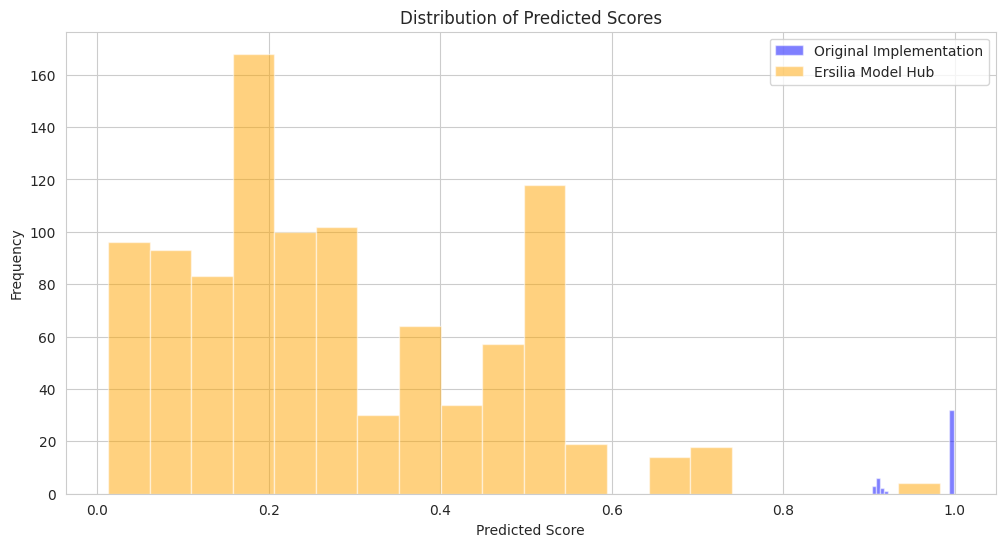

In [26]:
# In this code block I will compare the original implementation vs the EMH result

# Plot histograms for score distributions
plt.figure(figsize=(12, 6))

# Original implementation
plt.hist(predictions1_df['score'], bins=20, alpha=0.5, color='blue', label='Original Implementation')

# Ersilia Model Hub
plt.hist(predictions_df['score'], bins=20, alpha=0.5, color='orange', label='Ersilia Model Hub')

plt.title('Distribution of Predicted Scores')
plt.xlabel('Predicted Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

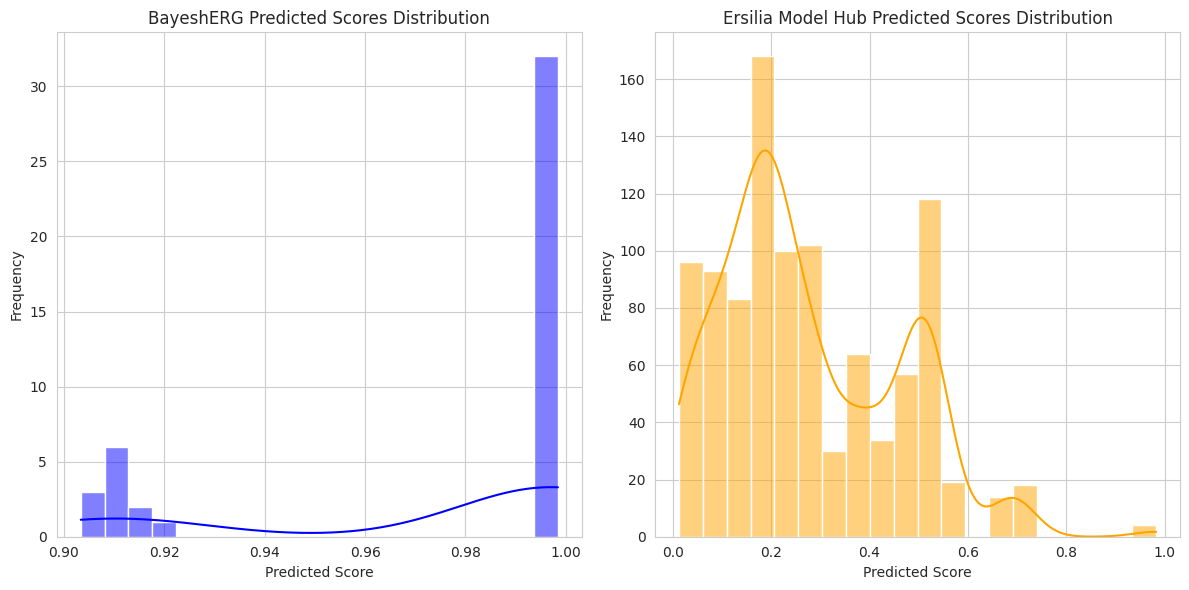

In [32]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Create subplots for each model's distribution
plt.figure(figsize=(12, 6))

# BayeshERG model
plt.subplot(1, 2, 1)
sns.histplot(predictions1_df['score'], bins=20, color='blue', kde=True)
plt.title('BayeshERG Predicted Scores Distribution')
plt.xlabel('Predicted Score')
plt.ylabel('Frequency')

# Ersilia Model Hub
plt.subplot(1, 2, 2)
sns.histplot(predictions_df['score'], bins=20, color='orange', kde=True)
plt.title('Ersilia Model Hub Predicted Scores Distribution')
plt.xlabel('Predicted Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


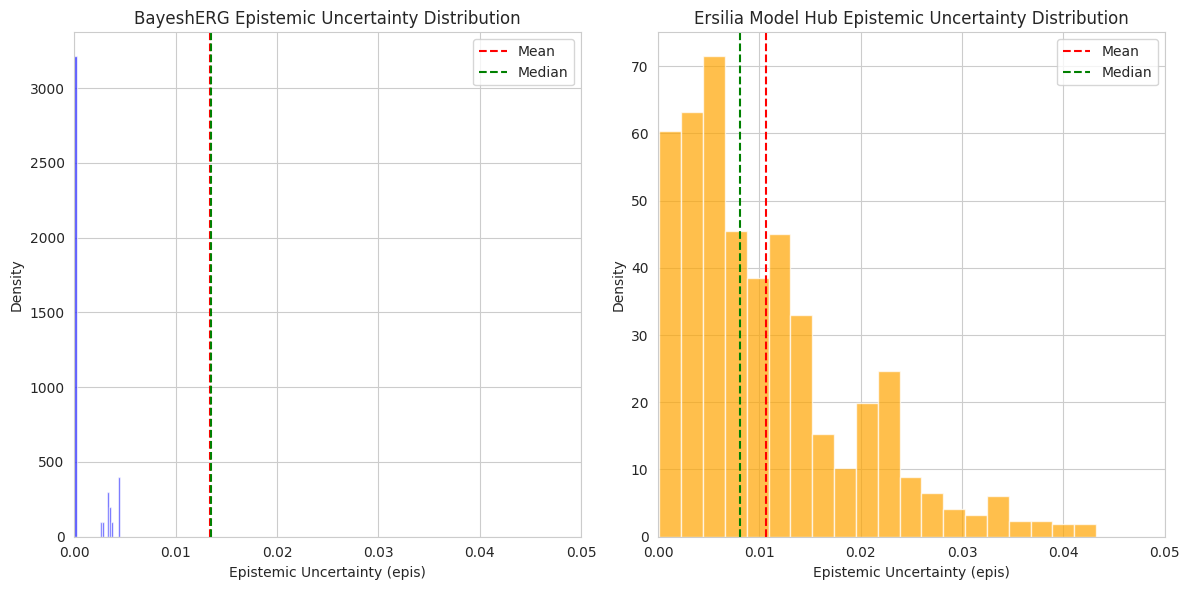

BayeshERG Epistemic Uncertainty:
Mean: 0.013347427044648648
Median: 0.01345296
Standard Deviation: 0.008231149214473175

Ersilia Model Hub Epistemic Uncertainty:
Mean: 0.01067549311596
Median: 0.008128441
Standard Deviation: 0.008618019674556507


In [27]:
# Plotting the distributions of epis values using Matplotlib only
plt.figure(figsize=(12, 6))

# Summary statistics for epis values
bayesherg_epis_mean = predictions4_df['epis'].mean()
bayesherg_epis_median = predictions4_df['epis'].median()
bayesherg_epis_std = predictions4_df['epis'].std()

emh_epis_mean = predictions_df['epis'].mean()
emh_epis_median = predictions_df['epis'].median()
emh_epis_std = predictions_df['epis'].std()

plt.subplot(1, 2, 1)
plt.hist(predictions1_df['epis'], bins=20, color='blue', alpha=0.7, density=True)
plt.axvline(x=bayesherg_epis_mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=bayesherg_epis_median, color='green', linestyle='--', label='Median')
plt.title('BayeshERG Epistemic Uncertainty Distribution')
plt.xlabel('Epistemic Uncertainty (epis)')
plt.ylabel('Density')
plt.xlim([0.00, 0.05])
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(predictions_df['epis'], bins=20, color='orange', alpha=0.7, density=True)
plt.axvline(x=emh_epis_mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=emh_epis_median, color='green', linestyle='--', label='Median')
plt.title('Ersilia Model Hub Epistemic Uncertainty Distribution')
plt.xlabel('Epistemic Uncertainty (epis)')
plt.ylabel('Density')
plt.xlim([0.00, 0.05])

plt.legend()

plt.tight_layout()
plt.show()

# get summary statistics
print("BayeshERG Epistemic Uncertainty:")
print("Mean:", bayesherg_epis_mean)
print("Median:", bayesherg_epis_median)
print("Standard Deviation:", bayesherg_epis_std)
print()
print("Ersilia Model Hub Epistemic Uncertainty:")
print("Mean:", emh_epis_mean)
print("Median:", emh_epis_median)
print("Standard Deviation:", emh_epis_std)


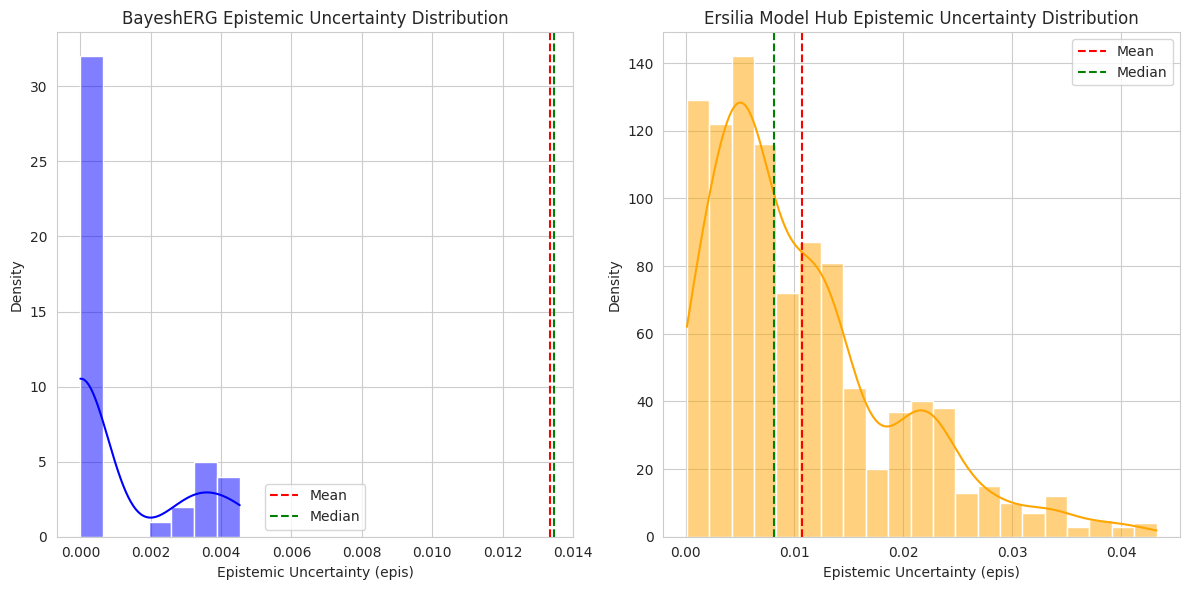

BayeshERG Epistemic Uncertainty:
Mean: 0.013347427044648648
Median: 0.01345296
Standard Deviation: 0.008231149214473175

Ersilia Model Hub Epistemic Uncertainty:
Mean: 0.01067549311596
Median: 0.008128441
Standard Deviation: 0.008618019674556507


In [34]:

# Plotting the distributions of epis values using Matplotlib and Seaborn for KDE
plt.figure(figsize=(12, 6))

# Summary statistics for epis values
bayesherg_epis_mean = predictions4_df['epis'].mean()
bayesherg_epis_median = predictions4_df['epis'].median()
bayesherg_epis_std = predictions4_df['epis'].std()

emh_epis_mean = predictions_df['epis'].mean()
emh_epis_median = predictions_df['epis'].median()
emh_epis_std = predictions_df['epis'].std()

plt.subplot(1, 2, 1)
sns.histplot(predictions1_df['epis'], color='blue', kde=True)
plt.axvline(x=bayesherg_epis_mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=bayesherg_epis_median, color='green', linestyle='--', label='Median')
plt.title('BayeshERG Epistemic Uncertainty Distribution')
plt.xlabel('Epistemic Uncertainty (epis)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(predictions_df['epis'], color='orange', kde=True) 
plt.axvline(x=emh_epis_mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=emh_epis_median, color='green', linestyle='--', label='Median')
plt.title('Ersilia Model Hub Epistemic Uncertainty Distribution')
plt.xlabel('Epistemic Uncertainty (epis)')
plt.ylabel('Density')

plt.legend()

plt.tight_layout()
plt.show()

# get summary statistics
print("BayeshERG Epistemic Uncertainty:")
print("Mean:", bayesherg_epis_mean)
print("Median:", bayesherg_epis_median)
print("Standard Deviation:", bayesherg_epis_std)
print()
print("Ersilia Model Hub Epistemic Uncertainty:")
print("Mean:", emh_epis_mean)
print("Median:", emh_epis_median)
print("Standard Deviation:", emh_epis_std)


In [ ]:
#The BayeshERG model generally exhibits higher epistemic uncertainty compared to the Ersilia Model Hub, with a higher mean (0.0133 vs. 0.0107).
#The median epistemic uncertainty is also higher for the BayeshERG model (0.0135 vs. 0.0081), indicating that a larger portion of its predictions has higher uncertainty compared to the Ersilia Model Hub.
# However, the standard deviation of epistemic uncertainty is slightly lower for the BayeshERG model (0.00823 vs. 0.00862), indicating less variability in uncertainty among its predictions compared to the Ersilia Model Hub